In [216]:
from visualization_functions import *
from geopandas import GeoDataFrame
import seaborn as sns
plt.style.use("classic")
sns.set(rc={"figure.figsize":(12,6)})

In [217]:
# We import the cleaned database from the clean.ipynb file
attacks_visual = pd.read_csv("attacks_cleaned.csv", index_col=0)

## Geographic distribution by States

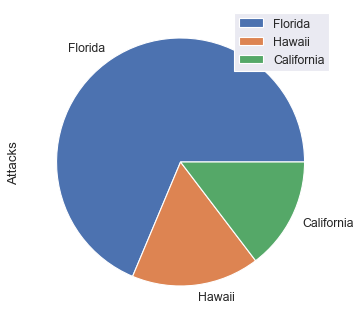

In [218]:
flo = attacks_visual["Area"].value_counts()[0]
haw = attacks_visual["Area"].value_counts()[1]
cal = attacks_visual["Area"].value_counts()[2]

area_distribution = pd.DataFrame({'Attacks': [flo, haw , cal]},
                  index=['Florida', 'Hawaii', 'California'])

plot = area_distribution.plot.pie(y='Attacks', figsize=(5, 5))



Firstly, it is important to observe how shark attacks are distributed among States. 
Florida, with 375, is the State that traditionally has more shark attacks.
Hawaii goes second with 91 and California is the State with less attacks, 80.


## Fatality rates

In [219]:
fatality_area_df = attacks_visual.groupby(["Area", "Fatal (Y/N)"])[["Area"]].count()
fatality_area_df

Area
Area       Fatal (Y/N)      
California N              72
           Y               2
Florida    N             365
           Y               2
Hawaii     N              84
           Y               5

Text(0.5, 1.0, 'Attacks vs. Fatalities per State')

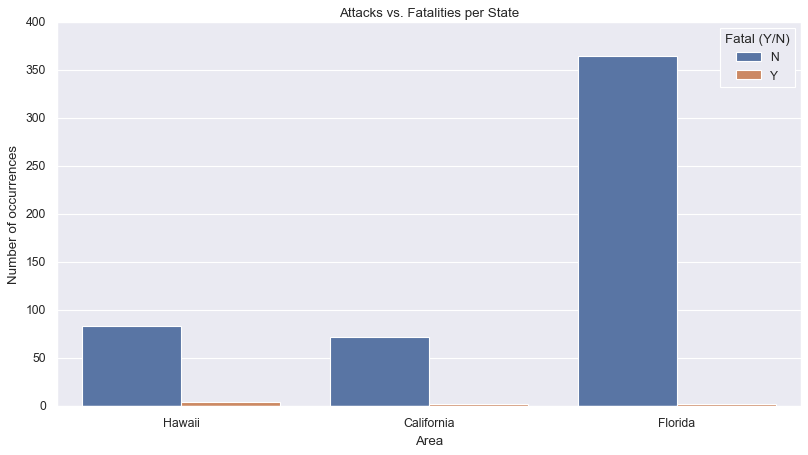

In [220]:
sns.countplot(data=attacks_visual, x="Area", hue="Fatal (Y/N)")
plt.ylabel("Number of occurrences")
plt.title("Attacks vs. Fatalities per State")

After his accident, John felt extremelly grateful for having survived the attack. Of course he was a privileged, since he did not suffer any major injury and the attack resulted in nothing but a scare, but the most common outcome is to survive.

In the Fatalities graph, we observe that deaths are minimal with respect to survival occurrences. The conclusions for this section are the following:
- The overall survival to death ratio is almost 58:1.
- Florida has the most attacks but the highest survival ratio.
- Hawaii is the State with less attacks but the deadliest.
- California seems to be the safest.

## Gender

Text(0.5, 1.0, 'Number of attacks per gender')

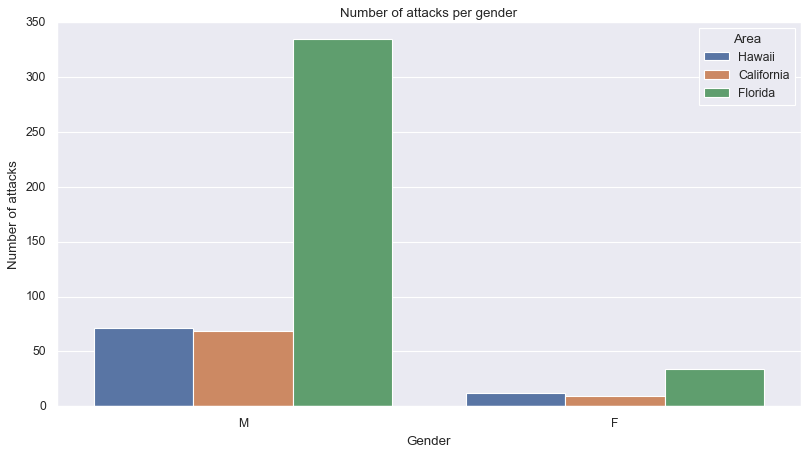

In [221]:
sns.countplot(data=attacks_visual, x="Sex ", hue="Area")
plt.xlabel("Gender")
plt.ylabel("Number of attacks")
plt.title("Number of attacks per gender")

In [222]:
gender_attacked = attacks_visual.groupby(["Area", "Sex "])[["Area"]].count()
gender_attacked

Area
Area       Sex       
California F        9
           M       69
Florida    F       34
           M      335
Hawaii     F       12
           M       71

On gender, it is easily observable that men suffer more attacks overall. One justification that could explain this fact is that there are more men who practise surfing and other similar sports and activities. Also, women might be more prudent and avoid certain risks, so they are less exposed to shark attacks.

Text(0.5, 1.0, 'Yearly attacks per gender')

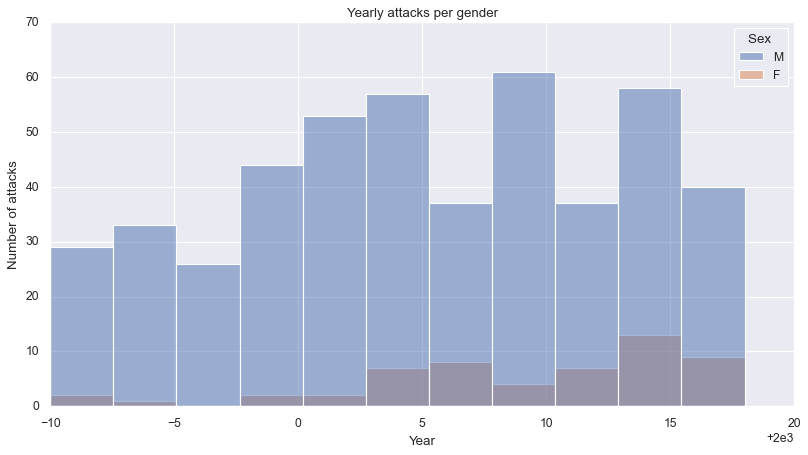

In [223]:
sns.histplot(data=attacks_visual, x="Year", hue="Sex ")
plt.ylabel("Number of attacks")
plt.title("Yearly attacks per gender")

The presence of women in surfing has been increasing durning the last decades. Nowadays it reaches 19% of total surfers, which is still a low number. As a consequence of this increase, so has done the share of attacks received by women. The graph above supports this remarks.

## Yearly evolution of attacks per State

Text(0.5, 1.0, 'Yearly attacks per State')

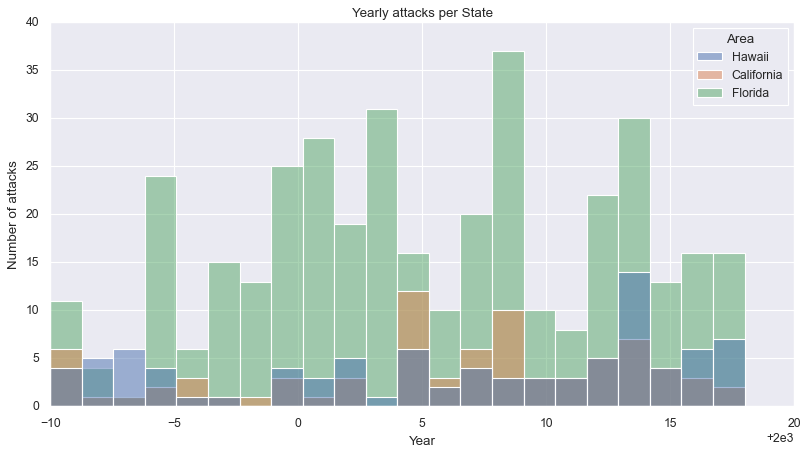

In [224]:
sns.histplot(attacks_visual, x="Year", hue="Area", bins = 22)
plt.ylabel("Number of attacks")
plt.title("Yearly attacks per State")

The yearly evolution of attacks in the US States of California, Hawaii and Florida seems to be in a decreasing trend with respect to the last decade. However, if we take the whole picture from the 90s, the trend increases slightly. Also, the number of surfers has increased during the past few years, so it is understandable that attacks have increased.

Last on this point, there are constant improvements on surfers' safety, from the early detection of sharks' presence to techniques to face their attacks, that can reduce the number and consequences of those attacks; the graph below shows that there is not a single death recorded from 2013.

<AxesSubplot: xlabel='Year', ylabel='Count'>

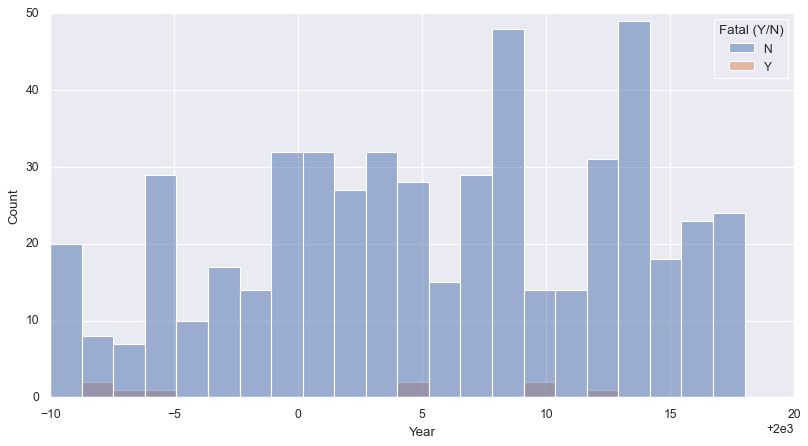

In [225]:
sns.histplot(attacks_visual, x="Year", hue="Fatal (Y/N)", bins = 22)

## Attacks per age group

In the following graph we see the age distribution of shark attacks' victims.
The range, which has increased throughout the years, is very extense; there are instances of very young children and some cases where the victims were elders.

The favorite age groups are concentrated around the 20 y.o. segments. In particular boys in their last teenage years are the most attacked group.

<AxesSubplot: xlabel='Year', ylabel='Age'>

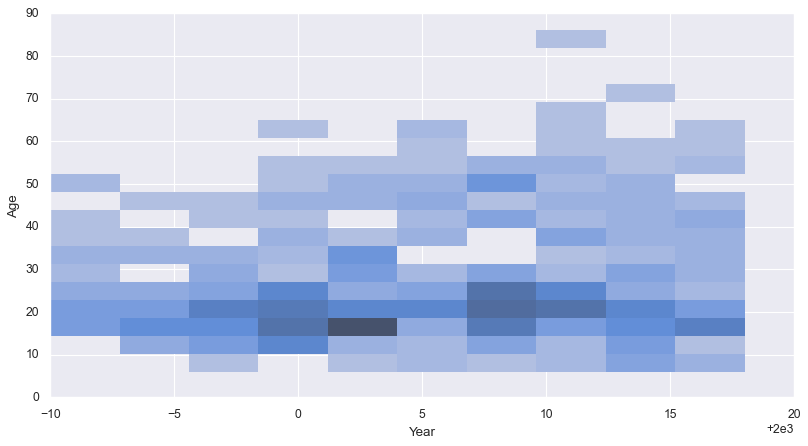

In [226]:
sns.histplot(data=attacks_visual, x="Year", y="Age")


In [227]:
california = attacks_visual[attacks_visual["Area"] == "California"]

florida = attacks_visual[attacks_visual["Area"] == "Florida"]

hawaii = attacks_visual[attacks_visual["Area"] == "Hawaii"]

<AxesSubplot: xlabel='Year', ylabel='Age'>

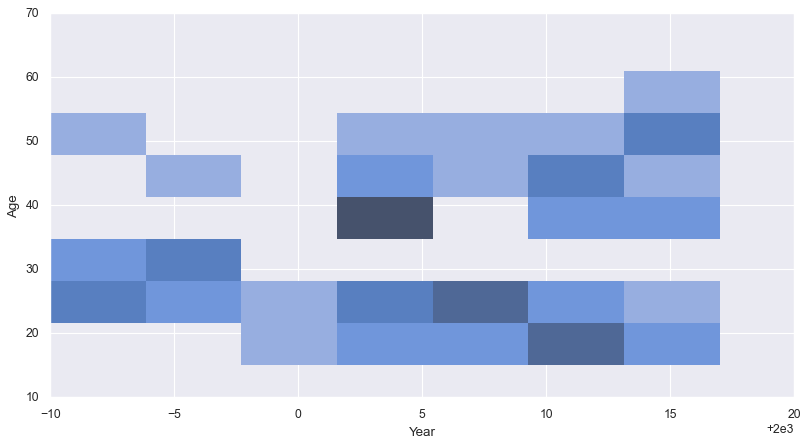

In [228]:
sns.histplot(data=california, x="Year", y="Age")

<AxesSubplot: xlabel='Year', ylabel='Age'>

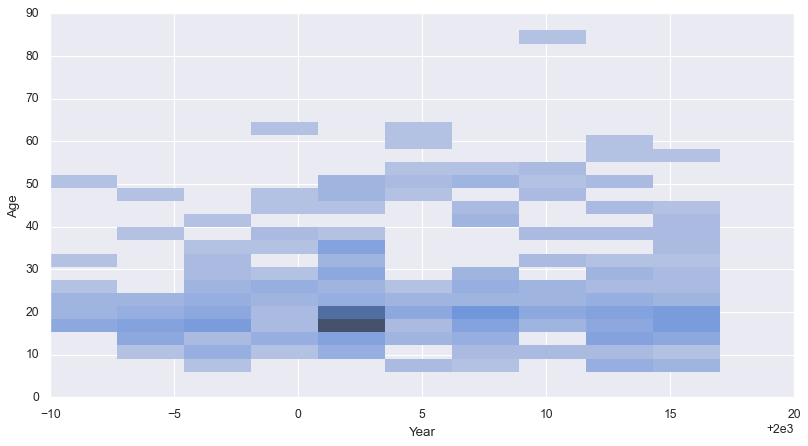

In [229]:
sns.histplot(data=florida, x="Year", y="Age")

<AxesSubplot: xlabel='Year', ylabel='Age'>

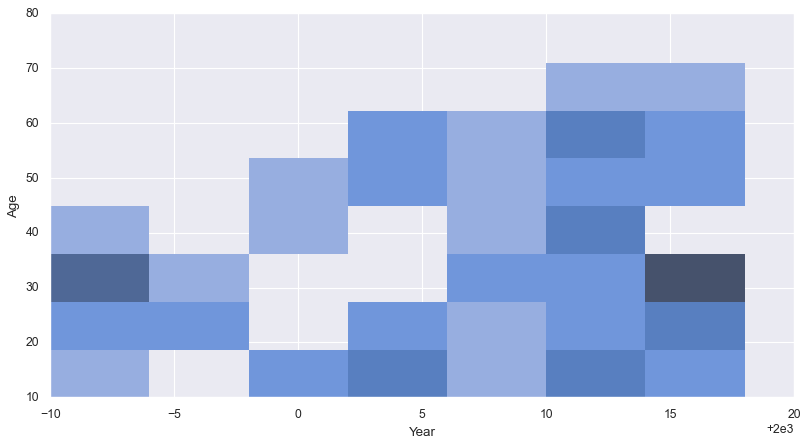

In [230]:
sns.histplot(data=hawaii, x="Year", y="Age")

Last but not least, we plot the graph of age groups distribution for State. It is interesting for John to see that there has not been any attack to boys in their last teen years and the beginning of their 20s.

Text(0, 0.5, 'Number of attacks')

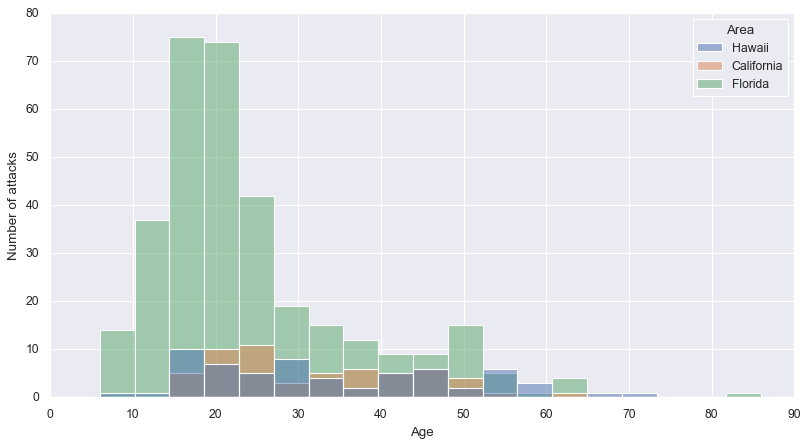

In [231]:
sns.histplot(data=attacks_visual, x="Age", hue="Area")
plt.ylabel("Number of attacks")

## Hourly distribution

It is very important for John to know in what hours sharks are more active; his intention was to surf from 16 to 20.

In the graph below we have plotted the hourly distribution of the attacks and the results that we have obtained are good news for John's interests: sharks are mostly active during the late morning, midday and early afternoon. There is a considerable drop around 16:00h.

Therefore, his initial schedule idea is safe to carry on, John will be able to enjoy his fruit shakes while watching sunset after surf sessions!

Text(0.5, 1.0, 'Hourly distribution of attacks per State')

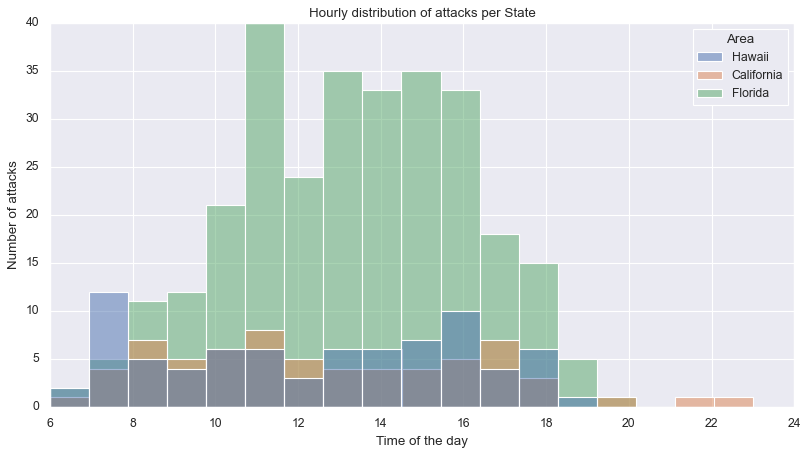

In [232]:
# histogram
sns.histplot(data=attacks_visual, x="Time", hue="Area", bins=18)
plt.xlabel("Time of the day")
plt.ylabel("Number of attacks")
plt.title("Hourly distribution of attacks per State")

## Monthly distribution

Surfing season hits its peak during summer, from June to September. It's the period in which conditions are the best, both in the sea and outside, to hold competitions and events.
Hence, John wanted to know which is the State with a "safest" summer.

In the graph below there is the monthly distribution of shark attacks by State, and we clearly observe that there are four months that register a remarkable number of attacks: 
April, August, September and October.

A good recomendation for John would be to compete in May and as well as in his preferred months, and reduce a bit the activity in September.

Text(0.5, 1.0, 'Monthly distribution of attacks')

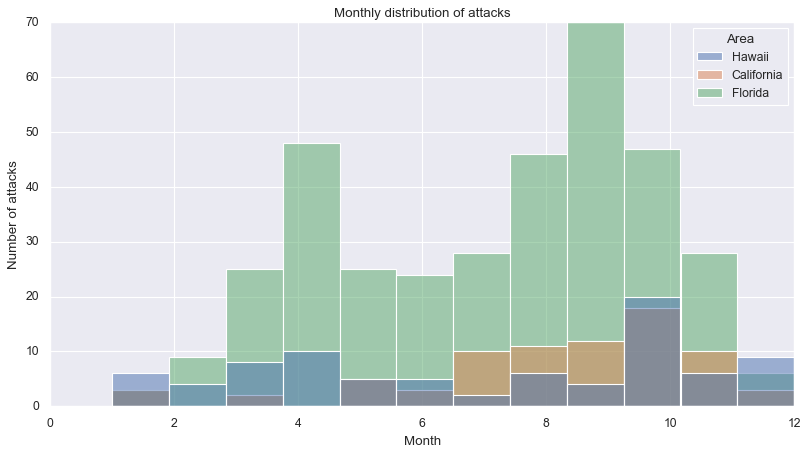

In [233]:
sns.histplot(data=attacks_visual, x="Month", hue="Area", bins=12)
plt.ylabel("Number of attacks")
plt.title("Monthly distribution of attacks")

## Daily distribution

Last but not least, we plotted the distribution of the attacks by weekdays.
The results show that human beings are a haute cuisine dish for sharks and they mostly eat this delicacy on weekends. The weekday with less attacks is Tuesday.

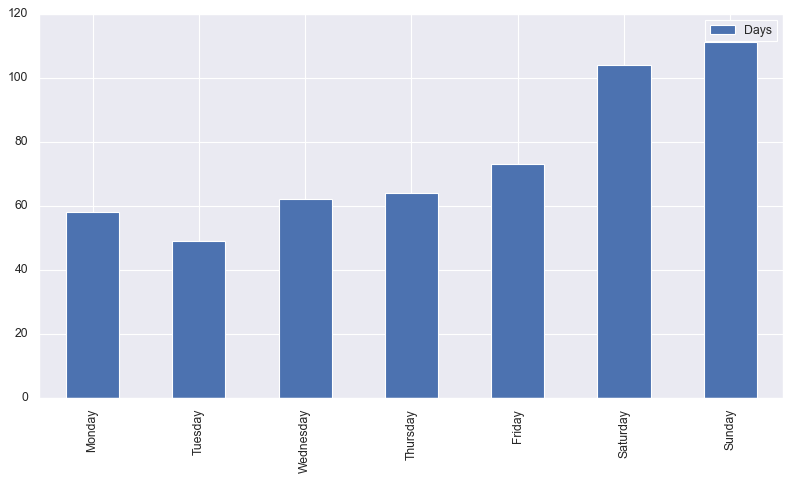

In [247]:
mon = attacks_visual["Weekday"].value_counts()[5]
tue = attacks_visual["Weekday"].value_counts()[6]
wed = attacks_visual["Weekday"].value_counts()[4]
thu = attacks_visual["Weekday"].value_counts()[3]
fri = attacks_visual["Weekday"].value_counts()[2]
sat = attacks_visual["Weekday"].value_counts()[1]
sun = attacks_visual["Weekday"].value_counts()[0]


daily_distribution = pd.DataFrame({'Days': [mon, tue , wed, thu, fri, sat, sun]},
                  index=['Monday', 'Tuesday', 'Wednesday', "Thursday", "Friday", "Saturday", "Sunday"])

plot = daily_distribution.plot(y='Days', kind="bar")


## Final remarks, conclusions and recommendations for John.

California is the State that has the lesser number of attacks and deaths.

Boys in their late teen years and early 20s are the gender and age group more likely to be attacked.

The number of attacks has increased slightly during the past decades despite of the increase of surfer practicioners. Safety measures are working out.

Sharks prefer humans for lunch over other meals, they are not that active from 16:00 onwards. John will be able to enjoy sunsets!

Sharks don't do holidays: they work the most on summer months, September and August, as well as on April and October. It would be good for John to surf more on May and reduce activity on September.

Sharks love to eat some delicacies on weekends, avoid surfing on Saturdays and Sundays.

Good luck John in your career and surf safe!
